# Random Forest Classification

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250
df = pd.read_csv('NonMotor_SocioBehavior_Categorized_Edit.csv')
print(df.shape)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250
(250, 46)


,APPRDX,Benton,COGSTATE,Clock,Epworth,Geriatric_Depression,Hopkins,Hopkins_Recog,LetterNumber,Lexical_Fluency,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,1,0,0,0,1,1,0,0,1,1,...,1,0,1,0,2,1,1,1,1,2
1,2,0,1,0,0,1,0,0,1,1,...,0,1,0,0,1,2,2,1,1,0


# Running Model with different Features

## RanFor 100 times, all 45 Feats 

In [3]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.81875
2
Mean accuracy: 0.81875
3
Mean accuracy: 0.8
4
Mean accuracy: 0.79375
5
Mean accuracy: 0.83125
6
Mean accuracy: 0.86875
7
Mean accuracy: 0.8125
8
Mean accuracy: 0.8125
9
Mean accuracy: 0.83125
10
Mean accuracy: 0.81875
11
Mean accuracy: 0.83125
12
Mean accuracy: 0.80625
13
Mean accuracy: 0.79375
14
Mean accuracy: 0.8375
15
Mean accuracy: 0.78125
16
Mean accuracy: 0.85625
17
Mean accuracy: 0.825
18
Mean accuracy: 0.80625
19
Mean accuracy: 0.8375
20
Mean accuracy: 0.78125
21
Mean accuracy: 0.81875
22
Mean accuracy: 0.8625
23
Mean accuracy: 0.80625
24
Mean accuracy: 0.825
25
Mean accuracy: 0.78125
26
Mean accuracy: 0.8
27
Mean accuracy: 0.7875
28
Mean accuracy: 0.78125
29
Mean accuracy: 0.7875
30
Mean accuracy: 0.85
31
Mean accuracy: 0.8125
32
Mean accuracy: 0.7875
33
Mean accuracy: 0.8
34
Mean accuracy: 0.7875
35
Mean accuracy: 0.8
36
Mean accuracy: 0.81875
37
Mean accuracy: 0.7875
38
Mean accuracy: 0.79375
39
Mean accuracy: 0.83125
40
Mean accuracy: 0.825
41
Me

In [4]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_45Feats_100RF10FCV_Categ.csv", index=False)

0.8046875000000001


In [29]:
df['APPRDX'] = df['APPRDX'] -1
df.head()

,APPRDX,Benton,COGSTATE,Clock,Epworth,Geriatric_Depression,Hopkins,Hopkins_Recog,LetterNumber,Lexical_Fluency,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,0,0,1,1,0,0,1,1,...,1,0,1,0,2,1,1,1,1,2
1,1,0,1,0,0,1,0,0,1,1,...,0,1,0,0,1,2,2,1,1,0
2,1,0,0,1,1,0,0,0,1,2,...,0,0,0,0,0,1,1,0,1,0
3,0,0,0,1,0,1,0,0,1,1,...,0,2,1,0,0,0,1,0,0,2
4,1,0,0,1,0,1,0,0,1,2,...,0,0,0,0,1,2,2,1,1,0


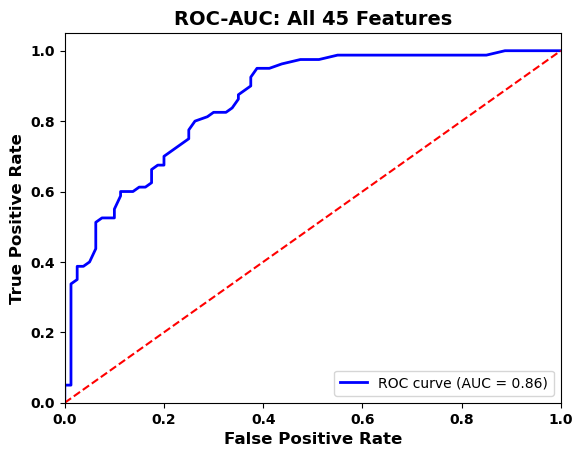

In [32]:
dataset = df.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: All 45 Features', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_All45Features_Categ.svg')
plt.savefig('ROC_AUC_All45Features_Categ.pdf')
plt.show()


## RanFor 100 times. Uncategorized i.e. Original Scores

In [15]:
%cd Z:\PPMI_Data\Excels\CollaborativeFiltering
df = pd.read_csv('Feats45_unCateg_APPRDX.csv')
print(df.shape)
df.head(2)

Z:\PPMI_Data\Excels\CollaborativeFiltering
(250, 48)


,PATNO,APPRDX,Patient_ID,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,3002,1,1,1,0,12.16,7,1,1,1,...,57,1,0,45,59,47.5,110,204,17,1
1,3010,1,2,1,1,7.76,6,1,1,0,...,36,1,3,40,39,52.0,27,52,9,0


In [17]:
df1 = df.drop(['PATNO','Patient_ID'], axis=1)
print(df1.shape)
df1.head(2)

(250, 46)


,APPRDX,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,DopaDefic,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,1,1,0,12.16,7,1,1,1,1,0,...,57,1,0,45,59,47.5,110,204,17,1
1,1,1,1,7.76,6,1,1,0,0,0,...,36,1,3,40,39,52.0,27,52,9,0


In [19]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.83125
2
Mean accuracy: 0.83125
3
Mean accuracy: 0.83125
4
Mean accuracy: 0.8
5
Mean accuracy: 0.825
6
Mean accuracy: 0.8625
7
Mean accuracy: 0.8375
8
Mean accuracy: 0.8125
9
Mean accuracy: 0.84375
10
Mean accuracy: 0.80625
11
Mean accuracy: 0.84375
12
Mean accuracy: 0.83125
13
Mean accuracy: 0.80625
14
Mean accuracy: 0.83125
15
Mean accuracy: 0.8375
16
Mean accuracy: 0.84375
17
Mean accuracy: 0.80625
18
Mean accuracy: 0.81875
19
Mean accuracy: 0.85
20
Mean accuracy: 0.83125
21
Mean accuracy: 0.825
22
Mean accuracy: 0.825
23
Mean accuracy: 0.8375
24
Mean accuracy: 0.85
25
Mean accuracy: 0.75625
26
Mean accuracy: 0.80625
27
Mean accuracy: 0.8125
28
Mean accuracy: 0.85
29
Mean accuracy: 0.7875
30
Mean accuracy: 0.84375
31
Mean accuracy: 0.80625
32
Mean accuracy: 0.85625
33
Mean accuracy: 0.825
34
Mean accuracy: 0.79375
35
Mean accuracy: 0.81875
36
Mean accuracy: 0.80625
37
Mean accuracy: 0.83125
38
Mean accuracy: 0.81875
39
Mean accuracy: 0.8375
40
Mean accuracy: 0.8375

In [20]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_45Feats_100RF10FCV_unCateg.csv", index=False)

0.8224374999999996


In [24]:
df1 ['APPRDX'] = df1 ['APPRDX'] -1
df1.head()

,APPRDX,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,DopaDefic,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,0,1,0,12.16,7,1,1,1,1,0,...,57,1,0,45,59,47.500000,110,204,17,1
1,0,1,1,7.76,6,1,1,0,0,0,...,36,1,3,40,39,52.000000,27,52,9,0
2,0,0,0,13.49,7,1,2,0,0,0,...,45,1,2,42,42,43.330002,90,252,26,0
3,0,0,0,9.78,6,1,2,0,0,0,...,49,1,2,49,47,42.500000,67,165,8,1
4,0,1,0,12.16,7,1,1,0,1,0,...,58,2,0,48,46,53.000000,41,126,24,0


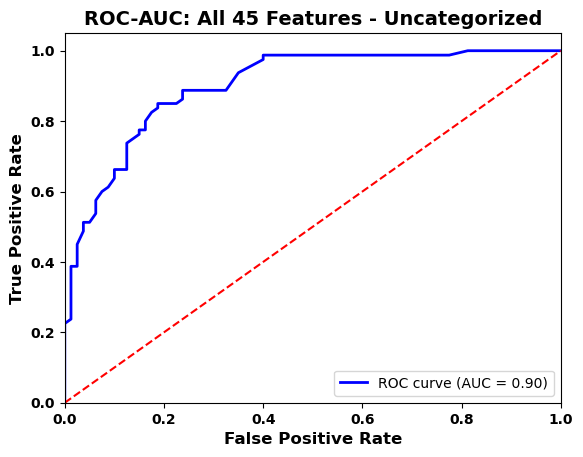

In [27]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: All 45 Features - Uncategorized', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_All45Features_unCateg.svg')
plt.savefig('ROC_AUC_All45Features_unCateg.pdf')
plt.show()


## Adding Gender as an independent variable

In [3]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250
df = pd.read_csv('NonMotor_SocioBehavior_Categorized_EditRaw_Gender.csv')
df = df.drop(['PATNO'], axis=1)
df['APPRDX'] = df['APPRDX'] -1
print(df.shape)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250
(250, 47)


,APPRDX,Gender,Benton,COGSTATE,Clock,Epworth,Geriatric_Depression,Hopkins,Hopkins_Recog,LetterNumber,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,2,0,0,0,1,1,0,0,1,...,1,0,1,0,2,1,1,1,1,2
1,1,2,0,1,0,0,1,0,0,1,...,0,1,0,0,1,2,2,1,1,0


In [5]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.78125
2
Mean accuracy: 0.79375
3
Mean accuracy: 0.76875
4
Mean accuracy: 0.78125
5
Mean accuracy: 0.8125
6
Mean accuracy: 0.84375
7
Mean accuracy: 0.7875
8
Mean accuracy: 0.81875
9
Mean accuracy: 0.825
10
Mean accuracy: 0.8
11
Mean accuracy: 0.825
12
Mean accuracy: 0.81875
13
Mean accuracy: 0.80625
14
Mean accuracy: 0.85
15
Mean accuracy: 0.8
16
Mean accuracy: 0.84375
17
Mean accuracy: 0.8375
18
Mean accuracy: 0.81875
19
Mean accuracy: 0.80625
20
Mean accuracy: 0.775
21
Mean accuracy: 0.8125
22
Mean accuracy: 0.85
23
Mean accuracy: 0.80625
24
Mean accuracy: 0.8125
25
Mean accuracy: 0.75
26
Mean accuracy: 0.775
27
Mean accuracy: 0.7875
28
Mean accuracy: 0.80625
29
Mean accuracy: 0.76875
30
Mean accuracy: 0.825
31
Mean accuracy: 0.7875
32
Mean accuracy: 0.80625
33
Mean accuracy: 0.76875
34
Mean accuracy: 0.7875
35
Mean accuracy: 0.825
36
Mean accuracy: 0.76875
37
Mean accuracy: 0.7875
38
Mean accuracy: 0.76875
39
Mean accuracy: 0.84375
40
Mean accuracy: 0.80625
41
Mean

In [6]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_45FeatsGender_100RF10FCV.csv", index=False)

0.7999999999999998


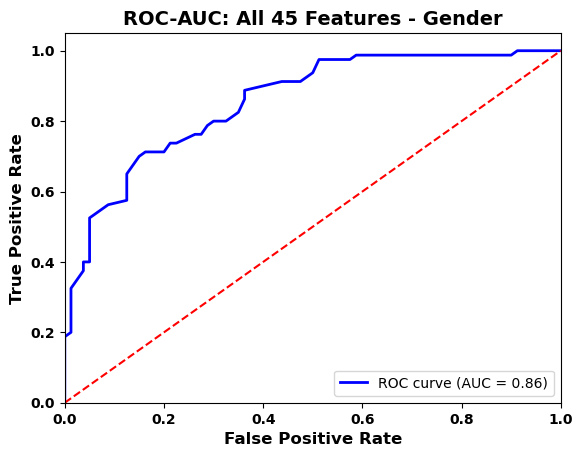

In [7]:
dataset = df.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: All 45 Features - Gender', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_All45Features_Gen.svg')
plt.savefig('ROC_AUC_All45Features_Gen.pdf')
plt.show()


In [8]:
df = pd.read_csv('NonMotor_SocioBehavior_unCategorized_Gender.csv')
df = df.drop(['PATNO','Patient_ID'], axis=1)
df['APPRDX'] = df['APPRDX'] -1
print(df.shape)
df.head(2)

(250, 47)


,APPRDX,Gender,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,0,2,1,0,12.16,7,1,1,1,1,...,57,1,0,45,59,47.500000,110,204,17,1
1,1,2,1,0,11.52,7,0,2,0,0,...,52,1,2,51,45,41.669998,43,105,37,2


In [9]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.8375
2
Mean accuracy: 0.80625
3
Mean accuracy: 0.825
4
Mean accuracy: 0.8
5
Mean accuracy: 0.81875
6
Mean accuracy: 0.875
7
Mean accuracy: 0.83125
8
Mean accuracy: 0.825
9
Mean accuracy: 0.83125
10
Mean accuracy: 0.8375
11
Mean accuracy: 0.81875
12
Mean accuracy: 0.8125
13
Mean accuracy: 0.83125
14
Mean accuracy: 0.80625
15
Mean accuracy: 0.81875
16
Mean accuracy: 0.86875
17
Mean accuracy: 0.825
18
Mean accuracy: 0.80625
19
Mean accuracy: 0.85
20
Mean accuracy: 0.81875
21
Mean accuracy: 0.84375
22
Mean accuracy: 0.85625
23
Mean accuracy: 0.83125
24
Mean accuracy: 0.8625
25
Mean accuracy: 0.775
26
Mean accuracy: 0.8
27
Mean accuracy: 0.8125
28
Mean accuracy: 0.81875
29
Mean accuracy: 0.775
30
Mean accuracy: 0.83125
31
Mean accuracy: 0.79375
32
Mean accuracy: 0.84375
33
Mean accuracy: 0.83125
34
Mean accuracy: 0.8125
35
Mean accuracy: 0.825
36
Mean accuracy: 0.8125
37
Mean accuracy: 0.79375
38
Mean accuracy: 0.825
39
Mean accuracy: 0.85
40
Mean accuracy: 0.86875
41
Mea

In [10]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NonMotor_45Feats_Gender_100RF10FCV_unCateg.csv", index=False)

0.8209375000000003


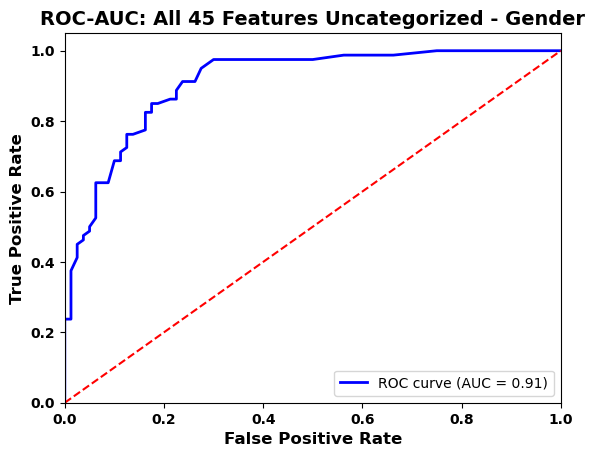

In [11]:
dataset = df.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: All 45 Features Uncategorized - Gender', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_All45Features_Gen_unCat.svg')
plt.savefig('ROC_AUC_All45Features_Gen_unCat.pdf')
plt.show()
